# Bayesian Data Analysis - project work 2019

#### Ali Salloum & Oskari Lehtonen

### Content

#### I. Intro to our problem
#### II. Description of the data & Feature exploration
#### III. The pooled and hiearchial model
#### IV. Model Diagnostics
#### V. Comparing the two models
#### VI. Conclusion

In [2]:
import pandas as pd
import pystan
from daft_plots import daft_pooled, daft_unpooled, daft_partpooled, daft_hier

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import patsy as pt
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("data/employee_data1.csv")

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Pooled model

In [ ]:
# skriivaa tähä kaavat

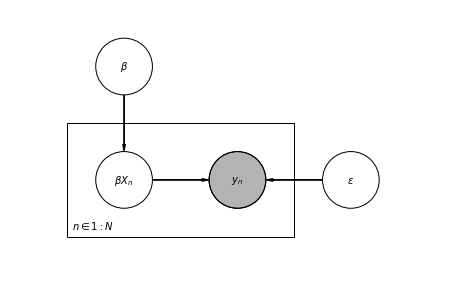

In [9]:
daft_pooled()

In [10]:
# tämä kun useampi predictor
model_pooled_stan_spec = """

    /* Spec for pooled regression linear model (robust) */

    data {                                 
        int<lower=0> N;                     // count of observations
        int<lower=0> K;                     // count of exog features
        matrix[N, K] X;                     // exog features
        vector[N] y;                        // endog feature
    }
    parameters {
        vector[K] beta;                     // exog coeffs
        real<lower=0> sigma;                // linear model error
    }
    transformed parameters {}
    model {  
        sigma ~ cauchy(0, 10);              // explicit prior for error (half-cauchy)
        y ~ student_t(1, X * beta, sigma);  // student-T likelihood
    }
    generated quantities {}
"""

In [11]:
# tämä kun yksi predictor
model_pooled_stan_spec = """

    /* Spec for pooled regression linear model (robust) */

    data {                                 
        int<lower=0> N;                     // count of observations
        vector[N] x;                        // exog features
        vector[N] y;                        // endog feature
    }
    parameters {
        real alpha;                          // intersect
        real beta;                          // exog slope
        real<lower=0> sigma;                // linear model error
    }
    transformed parameters {}
    model {  
        sigma ~ cauchy(0, 10);              // explicit prior for error (half-cauchy)
        y ~ normal(alpha + beta * x, sigma);
    }
    generated quantities {}
"""

In [12]:
age = df.Age.values
monthly_income = df.MonthlyIncome.values
#overall = df.Overall.values

In [13]:
pooled_data_dict = {'N': len(age), 
                    'x': age, 
                    'y': monthly_income}

pooled_fit = pystan.stan(model_code = model_pooled_stan_spec, 
                         data=pooled_data_dict, 
                         iter=1000, 
                         chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_042d5ea0283d4a5597965a3421e1a49b NOW.


In [14]:
pooled_fit

Inference for Stan model: anon_model_042d5ea0283d4a5597965a3421e1a49b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -2948    17.9 439.98  -3876  -3237  -2955  -2664  -2095    604    1.0
beta  255.96    0.47  11.59 233.88 248.48 255.97 263.54 279.92    601    1.0
sigma 4087.3    2.36  76.32 3935.9 4035.7 4086.3 4137.2 4246.0   1043    1.0
lp__  -1.3e4    0.06   1.29 -1.3e4 -1.3e4 -1.3e4 -1.3e4 -1.3e4    503   1.01

Samples were drawn using NUTS at Thu Dec  5 14:26:31 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [15]:
pooled_sample = pooled_fit.extract(permuted=True)

In [16]:
pooled_sample

OrderedDict([('alpha',
              array([-2991.94803776, -3835.31112128, -3730.15134013, ...,
                     -3189.77352548, -2460.39611772, -2830.95077077])),
             ('beta',
              array([255.85804755, 277.63607395, 274.2181611 , ..., 261.1266195 ,
                     239.98729406, 252.17901468])),
             ('sigma',
              array([3980.03036446, 3984.49860344, 4175.96380641, ..., 3965.57006824,
                     4115.79437872, 4143.68591928])),
             ('lp__',
              array([-12961.69331508, -12963.56632564, -12963.02522011, ...,
                     -12962.08170452, -12962.2185447 , -12961.09815712]))])

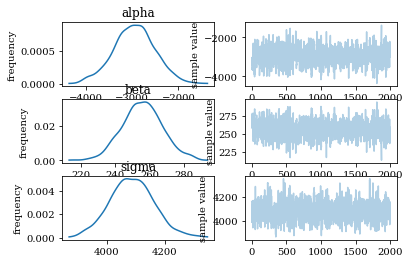

In [17]:
pooled_fit.plot()
plt.show()

In [74]:
alpha_estimate = pooled_sample["alpha"].mean()
beta_estimate = pooled_sample["beta"].mean()

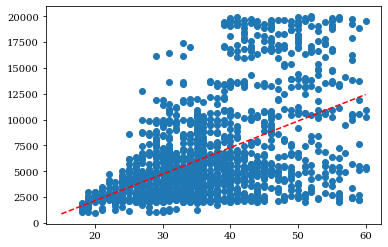

In [76]:
_ = plt.scatter(age, monthly_income)
xvals = np.linspace(15, 60)
_ = plt.plot(xvals, beta_estimate*xvals+alpha_estimate, 'r--')
#_ = plt.plot(xvals, beta_estimate*np.exp(beta_estimate*xvals), 'r--')

## Partial pooled model

In [ ]:
#skriivaa kaavat tähän

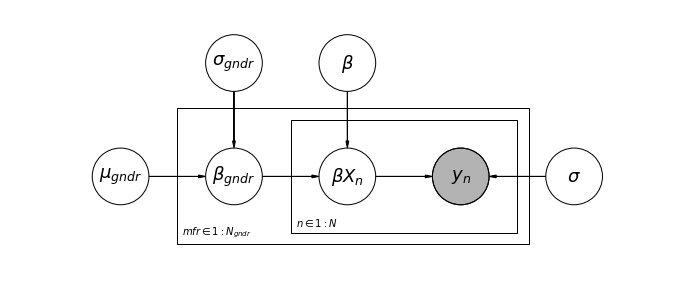

In [3]:
daft_partpooled()

In [49]:
# tää jos useampi predictor

mdl_partpooled_stan_spec_multi = """

    /* Spec for partpooled regression linear model */

    data {                                 
        int<lower=0> N;                         // count of observations
        int<lower=0> K;                         // count of exog features
        matrix[N, K] X;                         // exog features
        vector[N] y;                            // endog feature
        int<lower=0> n_gender;                  // count of gender index levels
        int<lower=1, upper=n_gender> gender_enc[N];// gender index encoding  
    }
    
    parameters {
        vector[K] beta;                         // exog coeffs
        real<lower=0> sigma;                    // linear model error       

        real gender_mu;                         // part-pooling prior mu
        real<lower=0> gender_sd;                // part-pooling prior sd    
        vector[n_gender] b0_gender;                // mfr intercept coeff
    }

    model {  
        
        gender_mu ~ normal(0, 10);                  // part-pooling prior mu
        gender_sd ~ cauchy(0, 10);                  // part-pooling prior sd
     
        for (gender in 1:n_gender) {
              b0_gender[gender] ~ normal(gender_mu, gender_sd);
        }
    
        sigma ~ cauchy(0, 10);                    // prior for error
        y ~ student_t(1, b0_gender[gender_enc] + X * beta, sigma);  // student-T likelihood
    }
    
"""

In [60]:
import psutil
import os

os.environ['STAN_NUM_THREADS'] = str(psutil.cpu_count())

le = LabelEncoder()
df['gender_enc'] = le.fit_transform(df['Gender'])
n_gender = df['gender_enc'].max()+1

fml_pooled = 'MonthlyIncome ~ ' + ' + '.join([
    'Age','PerformanceRating','TotalWorkingYears',
    'Education','YearsAtCompany',
])
print(fml_pooled)

(mx_en, mx_ex) = pt.dmatrices(
    fml_pooled, df,
    return_type='dataframe',
    NA_action='raise'
)

mdl_partpooled_stan_dict_multi = {
    'N': mx_ex.iloc[:,1:].shape[0],
    'K': mx_ex.iloc[:,1:].shape[1],
    'X': mx_ex.iloc[:,1:].values, 
    'y': mx_en['MonthlyIncome'].values,
    'gender_enc': df['gender_enc'].values + 1,
    'n_gender': n_gender
}


# Fit the model
part_pooled_multi = pystan.StanModel(
    model_code=mdl_partpooled_stan_spec_multi,
)

part_pooled_multi_fit = part_pooled_multi.sampling(
    data=mdl_partpooled_stan_dict_multi, 
    iter=5000, 
    chains=5,
    #adapt_delta=0.99,
)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dadf9c0a04b16f3555b4590335d82d36 NOW.


MonthlyIncome ~ Age + PerformanceRating + TotalWorkingYears + Education + YearsAtCompany


In [52]:
print(part_pooled_multi_fit)

Inference for Stan model: anon_model_dadf9c0a04b16f3555b4590335d82d36.
5 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=5000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[1]      -11.88    3.84  10.96 -32.38 -19.83 -12.28  -4.17   8.81      8   1.26
beta[2]      -91.86   174.0 367.64 -669.0 -390.9 -207.4 319.09 456.08      4   1.78
beta[3]      422.99    4.86  19.85 385.02 409.72 422.62 435.87 461.65     17   1.13
beta[4]       52.82   10.18  63.54 -69.08   9.28  51.93   95.9  179.5     39   1.07
beta[5]       30.83    1.92  25.18 -21.41  13.75  32.02  48.06  78.56    172   1.03
sigma        1479.5    3.08  51.65 1378.1 1444.7 1479.8 1512.0 1584.6    282   1.02
gender_mu      -0.1     0.2   9.95 -19.76  -6.84  -0.19   6.76  19.42   2581    1.0
gender_sd    2061.1  811.01 2737.9   1.58  18.45 1758.6 2965.9 8020.2     11   1.17
b0_gender[1] 1824.7  709.01 1467.6 -23.64   9.87 2342.2

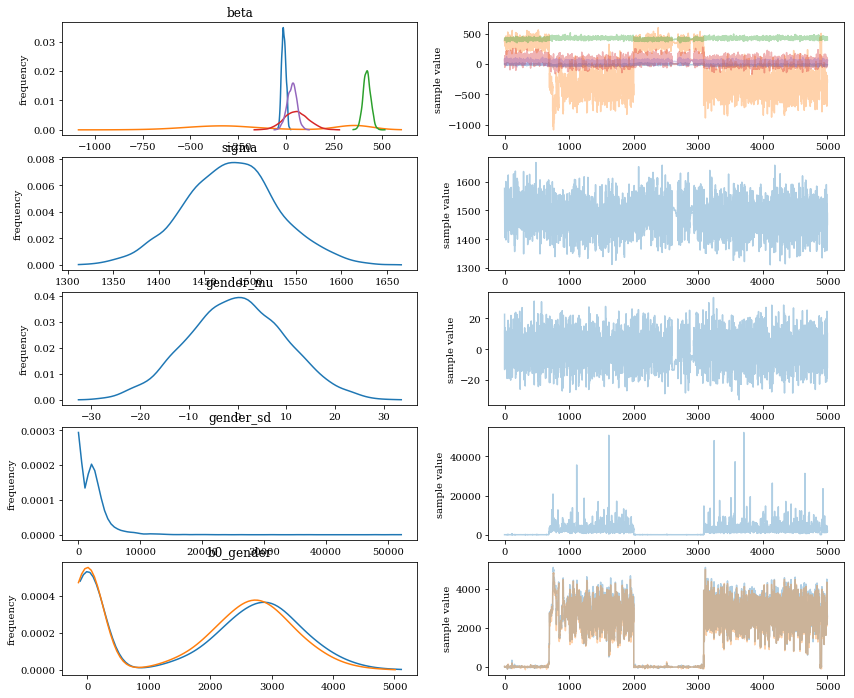

In [53]:
f = part_pooled_multi_fit.plot()
f.set_size_inches(14, 12)
plt.show()

In [57]:
# ja tää jos yks
mdl_partpooled_stan_spec = """

    /* Spec for partpooled regression linear model */

    data {                                 
        int<lower=0> N;                         // count of observations
        vector[N] x;                            // exog features
        vector[N] y;                            // endog feature
        int<lower=0> n_mfr;                     // count of mfr index levels
        int<lower=1, upper=n_mfr> mfr_enc[N];   // mfr index encoding  
    }
    parameters {
        real beta;                              // exog coeffs
        real<lower=0> sigma;                    // linear model error       

        real mfr_mu;                            // part-pooling prior mu
        real<lower=0> mfr_sd;                   // part-pooling prior sd    
        vector[n_mfr] b0_mfr;                   // mfr intercept coeff
    }
    transformed parameters {}
    model {  
        
        mfr_mu ~ normal(0, 10);                  // part-pooling prior mu
        mfr_sd ~ cauchy(0, 10);                  // part-pooling prior sd
     
        for (mfr in 1:n_mfr) {
              b0_mfr[mfr] ~ normal(mfr_mu, mfr_sd);
        }
    
        sigma ~ cauchy(0, 10);                    // prior for error
        y ~ student_t(1, b0_mfr[mfr_enc] + x * beta, sigma);  // student-T likelihood
    }
    generated quantities {}
"""

In [93]:
age = df.Age.values
monthly_income = df.MonthlyIncome.values
gender = df.Gender.values
gender = np.where(gender=="Female", 1, gender)
gender = np.where(gender=="Male", 2, gender)
gender = np.array(gender, dtype=int)

In [105]:
part_pooled_data_dict = {'N': len(monthly_income),
                         'n_mfr': 2,
                         'mfr_enc': gender,
                         'x': age,
                         'y': monthly_income}

part_pooled_fit = pystan.stan(model_code=mdl_partpooled_stan_spec, data=part_pooled_data_dict, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7f7e542cf769387b129d6975081f765f NOW.
/opt/conda/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /tmp/tmp1au0te2_/stanfit4anon_model_7f7e542cf769387b129d6975081f765f_774746200924702042.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [119]:
print(part_pooled_fit)

Inference for Stan model: anon_model_7f7e542cf769387b129d6975081f765f.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta      130.99    0.39   2.45 126.46 129.13  130.9  132.7 135.21     39   1.11
sigma     1772.8    3.02  64.96 1643.2 1725.7 1778.6 1817.1 1900.6    462   1.02
mfr_mu     -0.78    0.48   9.16 -18.56  -6.89  -0.93   4.86  17.92    369   1.01
mfr_sd      19.9    2.72  38.33   1.48   3.67   8.74  20.62 104.39    198   1.02
b0_mfr[0]  -1.14    0.99  29.38 -52.06 -10.14  -1.02   8.36  53.06    885   1.01
b0_mfr[1]  -5.71    2.12  33.64 -93.92 -12.11  -2.67   6.09  46.36    253   1.02
lp__      -1.3e4     0.3   2.91 -1.3e4 -1.3e4 -1.3e4 -1.3e4 -1.3e4     92   1.07

Samples were drawn using NUTS at Thu Dec  5 00:00:55 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale re

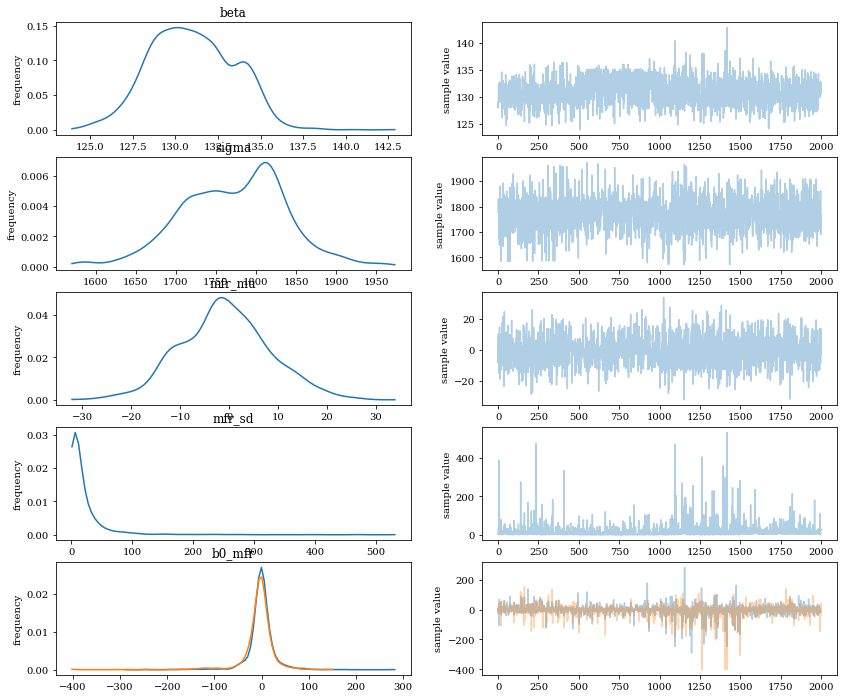

In [107]:
f = part_pooled_fit.plot()
f.set_size_inches(14, 12)
plt.show()

In [143]:
posterior = part_pooled_fit.extract(permuted=True)

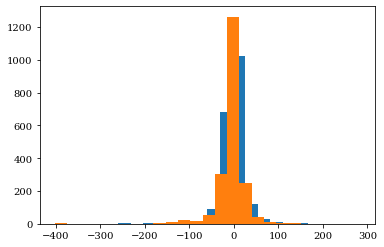

In [187]:
_ = plt.hist(posterior["b0_mfr"].T[0], bins=20)
_ = plt.hist(posterior["b0_mfr"].T[1], bins=20)

## Hierarchial model

In [ ]:
hier_data_dict = {'N': len(age), 
                    'x': age, 
                    'y': monthly_income}